#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同 loss function
    2. Dataset 的特性跟我們選用的 loss function 對 accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary_crossentropy"
    查看 Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
# 取得 Keras Dataset
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
# 確認 CIFAR10 Dataset 資料維度
print("train data:", 'images:', x_img_train.shape,
      " labels:", y_label_train.shape) 
print(" test data:", 'images:', x_img_test.shape,
      " labels:", y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
 test data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
# 資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
# 針對 Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
def Create_Model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
                     input_shape=(32, 32, 3), 
                     activation='relu', 
                     padding='same'))

    model.add(Dropout(rate=0.25))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))

    model.add(Dropout(0.25))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(rate=0.25))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(10, activation='softmax'))
    
    return model

In [8]:
model = Create_Model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 載入之前訓練的模型

In [9]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# 定義一個繪圖函數
def show_train_history(train_history, train_acc, test_acc, ylabel):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend([train_acc, test_acc], loc='upper left')
    plt.show()

## Categorical Cross Entropy

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1172/1172 [==============================] - 66s 56ms/step - loss: 1.4459 - accuracy: 0.4778 - val_loss: 1.2942 - val_accuracy: 0.5830
Epoch 2/10
1172/1172 [==============================] - 60s 51ms/step - loss: 1.1159 - accuracy: 0.6033 - val_loss: 1.1121 - val_accuracy: 0.6194
Epoch 3/10
1172/1172 [==============================] - 61s 52ms/step - loss: 0.9630 - accuracy: 0.6575 - val_loss: 0.9997 - val_accuracy: 0.6698
Epoch 4/10
1172/1172 [==============================] - 64s 55ms/step - loss: 0.8451 - accuracy: 0.7036 - val_loss: 0.9422 - val_accuracy: 0.6786
Epoch 5/10
1172/1172 [==============================] - 62s 53ms/step - loss: 0.7326 - accuracy: 0.7412 - val_loss: 0.8636 - val_accuracy: 0.7104
Epoch 6/10
1172/1172 [==============================] - 60s 52ms/step - loss: 0.6390 - accuracy: 0.7747 - val_loss: 0.8375 - val_accuracy: 0.7157
Epoch 7/10
1172/1172 [==============================] - 61s 52ms/step - loss: 0.5545 - accuracy: 0.8049 - val_loss: 0.8401 -

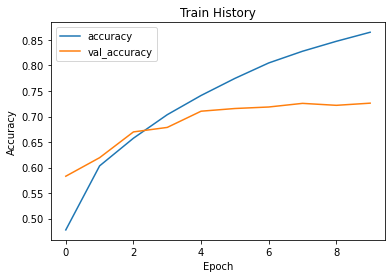

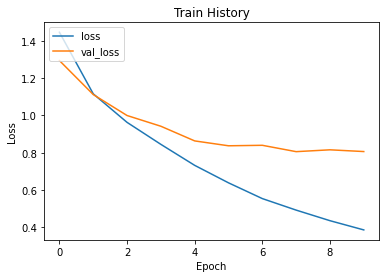

313/313 [==============================] - 4s 13ms/step - loss: 0.8361 - accuracy: 0.7212
Accuracy = 0.7211999893188477


In [12]:
show_train_history(train_history, 'accuracy', 'val_accuracy', 'Accuracy')
show_train_history(train_history, 'loss', 'val_loss', 'Loss')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print(f'Accuracy = {scores[1]}')

## MSE

In [13]:
model = Create_Model()

model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1172/1172 [==============================] - 66s 56ms/step - loss: 0.0693 - accuracy: 0.4382 - val_loss: 0.0608 - val_accuracy: 0.5670
Epoch 2/10
1172/1172 [==============================] - 72s 61ms/step - loss: 0.0563 - accuracy: 0.5692 - val_loss: 0.0519 - val_accuracy: 0.6326
Epoch 3/10
1172/1172 [==============================] - 68s 58ms/step - loss: 0.0504 - accuracy: 0.6230 - val_loss: 0.0486 - val_accuracy: 0.6539
Epoch 4/10
1172/1172 [==============================] - 63s 54ms/step - loss: 0.0460 - accuracy: 0.6608 - val_loss: 0.0459 - val_accuracy: 0.6764
Epoch 5/10
1172/1172 [==============================] - 62s 53ms/step - loss: 0.0417 - accuracy: 0.6958 - val_loss: 0.0433 - val_accuracy: 0.6903
Epoch 6/10
1172/1172 [==============================] - 62s 53ms/step - loss: 0.0385 - accuracy: 0.7234 - val_loss: 0.0434 - val_accuracy: 0.6862
Epoch 7/10
1172/1172 [==============================] - 66s 56ms/step - loss: 0.0353 - accuracy: 0.7499 - val_loss: 0.0416 -

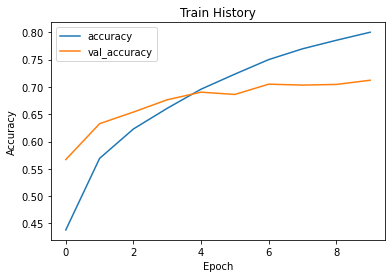

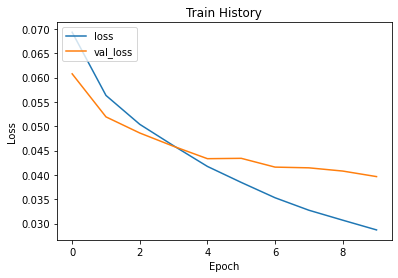

313/313 [==============================] - 3s 10ms/step - loss: 0.0400 - accuracy: 0.7122
Accuracy = 0.7121999859809875


In [14]:
show_train_history(train_history, 'accuracy', 'val_accuracy', 'Accuracy')
show_train_history(train_history, 'loss', 'val_loss', 'Loss')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print(f'Accuracy = {scores[1]}')

## Binary Cross Entropy

In [15]:
model = Create_Model()

model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1172/1172 [==============================] - 66s 56ms/step - loss: 0.2264 - accuracy: 0.4789 - val_loss: 0.2039 - val_accuracy: 0.5804
Epoch 2/10
1172/1172 [==============================] - 60s 51ms/step - loss: 0.1783 - accuracy: 0.6086 - val_loss: 0.1755 - val_accuracy: 0.6522
Epoch 3/10
1172/1172 [==============================] - 63s 54ms/step - loss: 0.1568 - accuracy: 0.6657 - val_loss: 0.1673 - val_accuracy: 0.6596
Epoch 4/10
1172/1172 [==============================] - 63s 53ms/step - loss: 0.1416 - accuracy: 0.7052 - val_loss: 0.1504 - val_accuracy: 0.7074
Epoch 5/10
1172/1172 [==============================] - 61s 52ms/step - loss: 0.1277 - accuracy: 0.7400 - val_loss: 0.1467 - val_accuracy: 0.7018
Epoch 6/10
1172/1172 [==============================] - 64s 55ms/step - loss: 0.1143 - accuracy: 0.7754 - val_loss: 0.1377 - val_accuracy: 0.7219
Epoch 7/10
1172/1172 [==============================] - 64s 54ms/step - loss: 0.1045 - accuracy: 0.8009 - val_loss: 0.1320 -

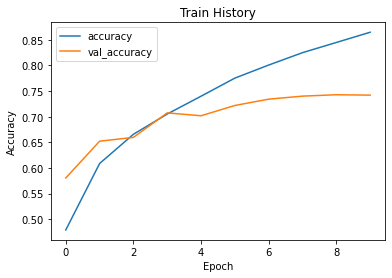

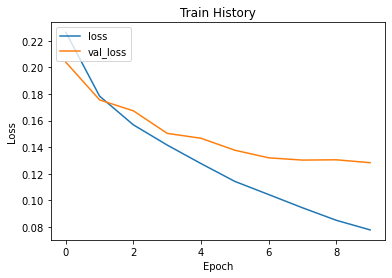

313/313 [==============================] - 3s 10ms/step - loss: 0.1303 - accuracy: 0.7406
Accuracy = 0.7405999898910522


In [16]:
show_train_history(train_history, 'accuracy', 'val_accuracy', 'Accuracy')
show_train_history(train_history, 'loss', 'val_loss', 'Loss')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print(f'Accuracy = {scores[1]}')